<a href="https://colab.research.google.com/github/aletbm/MySolutions_MLZoomcamp2024_DataTalks.Club/blob/main/06_Decision_trees_and_ensemble_learning/6_Decision_trees_and_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6th week's homework - by [Alexander Daniel Rios](https://linktr.ee/aletbm)

# Dataset
In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv):
```
wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
```

In [ ]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-11-06 01:34:51--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-06 01:34:51--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.06s   

2024-11-06 01:34:51 (5.84 MB/s) - ‘jamb_exam_result

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `JAMB_Score`).

## Preparing the dataset
First, let's make the names lowercase:
```
df.columns = df.columns.str.lower().str.replace(' ', '_')
```
Preparation:

+ Remove the `student_id` column.
+ Fill missing values with zeros.
+ Do train/validation/test split with 60%/20%/20% distribution.
+ Use the `train_test_split` function and set the `random_state` parameter to 1.
+ Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [ ]:
import pandas as pd

df_raw = pd.read_csv("/content/jamb_exam_results.csv")
df_raw.head(5)

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [ ]:
df_raw = df_raw.rename(str.lower, axis='columns')
df_raw.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'student_id', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [ ]:
df = df_raw.drop(["student_id"], axis=1)
df.head(5)

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [ ]:
df.isna().sum()

,0
jamb_score,0
study_hours_per_week,0
attendance_rate,0
teacher_quality,0
distance_to_school,0
school_type,0
school_location,0
extra_tutorials,0
access_to_learning_materials,0
parent_involvement,0


In [ ]:
df = df.fillna(0)
df.isna().sum()

,0
jamb_score,0
study_hours_per_week,0
attendance_rate,0
teacher_quality,0
distance_to_school,0
school_type,0
school_location,0
extra_tutorials,0
access_to_learning_materials,0
parent_involvement,0


In [ ]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [ ]:
from sklearn.feature_extraction import DictVectorizer

df_train_dict = df_train.to_dict(orient='records')
df_val_dict = df_val.to_dict(orient='records')
df_test_dict = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False).set_output(transform='pandas')
dv.fit(df_train_dict)

df_train = dv.transform(df_train_dict)
df_val = dv.transform(df_val_dict)
df_test = dv.transform(df_test_dict)

In [ ]:
df_train.head(5)

,access_to_learning_materials=No,access_to_learning_materials=Yes,age,assignments_completed,attendance_rate,distance_to_school,extra_tutorials=No,extra_tutorials=Yes,gender=Female,gender=Male,...,parent_involvement=Medium,school_location=Rural,school_location=Urban,school_type=Private,school_type=Public,socioeconomic_status=High,socioeconomic_status=Low,socioeconomic_status=Medium,study_hours_per_week,teacher_quality
0,0.0,1.0,21.0,3.0,72.0,4.4,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,20.0,3.0
1,0.0,1.0,22.0,1.0,80.0,3.3,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,11.0,2.0
2,0.0,1.0,19.0,2.0,82.0,8.3,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,31.0,1.0
3,0.0,1.0,19.0,2.0,79.0,15.8,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,29.0,1.0
4,0.0,1.0,19.0,3.0,96.0,8.9,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,28.0,2.0


In [ ]:
X_train, y_train = df_train.drop(["jamb_score"], axis=1), df_train["jamb_score"]
X_val, y_val = df_val.drop(["jamb_score"], axis=1), df_val["jamb_score"]
X_test, y_test = df_test.drop(["jamb_score"], axis=1), df_test["jamb_score"]

# Question 1
Let's train a decision tree regressor to predict the `jamb_score` variable.

+ Train a model with `max_depth=1`.

Which feature is used for splitting the data?

+ `study_hours_per_week`
+ `attendance_rate`
+ `teacher_quality`
+ `distance_to_school`

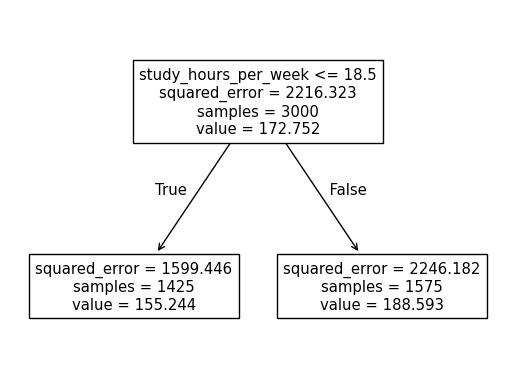

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)
plot_tree(dt, feature_names=X_train.columns);

# Question 2
Train a random forest model with these parameters:

+ `n_estimators=10`
+ `random_state=1`
+ `n_jobs=-1` (optional - to make training faster)

What's the RMSE of this model on validation?

+ 22.13
+ 42.13
+ 62.13
+ 82.12

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error as RMSE

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_val = rf.predict(X_val)

RMSE(y_val, y_pred_val)

42.13724207871227

# Question 3
Now let's experiment with the `n_estimators` parameter

+ Try different values of this parameter from 10 to 200 with step 10.
+ Set `random_state` to 1.
+ Evaluate the model on the validation dataset.

After which value of `n_estimators` does RMSE stop improving? Consider 3 decimal places for calculating the answer.

+ 10
+ 25
+ 80
+ 200

In [ ]:
import numpy as np

for n in np.arange(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_val = rf.predict(X_val)
    print(f"n_estimators={n} -> RMSE={RMSE(y_val, y_pred_val)}")

n_estimators=10 -> RMSE=42.13724207871227
n_estimators=20 -> RMSE=41.46121464694444
n_estimators=30 -> RMSE=41.106170947924596
n_estimators=40 -> RMSE=40.917193933296545
n_estimators=50 -> RMSE=40.852278663496854
n_estimators=60 -> RMSE=40.78428140159447
n_estimators=70 -> RMSE=40.677098222414024
n_estimators=80 -> RMSE=40.53933283129176
n_estimators=90 -> RMSE=40.50434592594835
n_estimators=100 -> RMSE=40.51680451861919
n_estimators=110 -> RMSE=40.59335280539747
n_estimators=120 -> RMSE=40.6248503681005
n_estimators=130 -> RMSE=40.650840905587195
n_estimators=140 -> RMSE=40.5948515491302
n_estimators=150 -> RMSE=40.596715029667116
n_estimators=160 -> RMSE=40.60350763548252
n_estimators=170 -> RMSE=40.62754627591216
n_estimators=180 -> RMSE=40.641313925139386
n_estimators=190 -> RMSE=40.63135509073867
n_estimators=200 -> RMSE=40.60101912236933


# Question 4
Let's select the best `max_depth`:

+ Try different values of `max_depth`: `[10, 15, 20, 25]`
+ For each of these values,
 + try different values of n_estimators from 10 till 200 (with step 10)
 + calculate the mean RMSE
+ Fix the random seed: `random_state=1`

What's the best `max_depth`, using the mean RMSE?

+ 10
+ 15
+ 20
+ 25

In [ ]:
for md in [10, 15, 20, 25]:
    rmse_scores = []
    for n in np.arange(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=md, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred_val = rf.predict(X_val)
        rmse_scores.append(RMSE(y_val, y_pred_val))
    print(f"max_depth={md} -> mean RMSE={np.mean(rmse_scores)}")

max_depth=10 -> mean RMSE=40.39249798892396
max_depth=15 -> mean RMSE=40.73528172486332
max_depth=20 -> mean RMSE=40.739734321829275
max_depth=25 -> mean RMSE=40.78786565962805


# Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field.

For this homework question, we'll find the most important feature:

+ Train the model with these parameters:
 + `n_estimators=10`,
 + `max_depth=20`,
 + `random_state=1`,
 + `n_jobs=-1` (optional)
+ Get the feature importance information from this model

What's the most important feature (among these 4)?

+ `study_hours_per_week`
+ `attendance_rate`
+ `distance_to_school`
+ `teacher_quality`

In [ ]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=["feature_importances"]).sort_values(by="feature_importances", ascending=False)

,feature_importances
study_hours_per_week,0.248354
attendance_rate,0.149729
distance_to_school,0.136486
teacher_quality,0.082682
age,0.069311
assignments_completed,0.031517
socioeconomic_status=High,0.025714
parent_involvement=High,0.022919
it_knowledge=High,0.017719
parent_education_level=Secondary,0.016957


# Question 6
Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

+ Install `XGBoost`
+ Create `DMatrix` for train and validation
+ Create a watchlist
+ Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which `eta` leads to the best RMSE score on the validation dataset?

+ 0.3
+ 0.1
+ Both give equal value

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.tolist())
dval = xgb.DMatrix(X_val, y_val, feature_names=X_val.columns.tolist())
dtest = xgb.DMatrix(X_test, y_test, feature_names=X_test.columns.tolist())

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

[0]	train-rmse:42.69552	val-rmse:44.86028
[10]	train-rmse:31.55119	val-rmse:40.83684
[20]	train-rmse:27.24424	val-rmse:41.80313
[30]	train-rmse:24.12906	val-rmse:42.28557
[40]	train-rmse:21.45994	val-rmse:42.77917
[50]	train-rmse:19.30407	val-rmse:43.11630
[60]	train-rmse:17.42414	val-rmse:43.40830
[70]	train-rmse:15.74173	val-rmse:43.77894
[80]	train-rmse:14.28350	val-rmse:44.08528
[90]	train-rmse:12.90222	val-rmse:44.30365
[99]	train-rmse:11.56417	val-rmse:44.43210


In [ ]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

[0]	train-rmse:45.50072	val-rmse:46.99373
[10]	train-rmse:37.11353	val-rmse:41.55631
[20]	train-rmse:33.57997	val-rmse:40.37859
[30]	train-rmse:31.47315	val-rmse:40.20963
[40]	train-rmse:29.89807	val-rmse:40.15747
[50]	train-rmse:28.58793	val-rmse:40.28533
[60]	train-rmse:27.26360	val-rmse:40.55054
[70]	train-rmse:26.05959	val-rmse:40.73555
[80]	train-rmse:25.13835	val-rmse:40.82813
[90]	train-rmse:23.93958	val-rmse:40.89645
[99]	train-rmse:23.14487	val-rmse:41.04335
